<h1><center><span style="border-style:solid;border-width:1px;border-radius:5px;
    padding:5px;background-color:yellow;box-shadow: 6px 6px 6px black;">Partie 3 Décodage d'une trame Ethernet</span></center></h1>



# 1. Récupération des données CSV

En TP de physique, nous avons étudié les trames ethernet à l'oscilloscope:



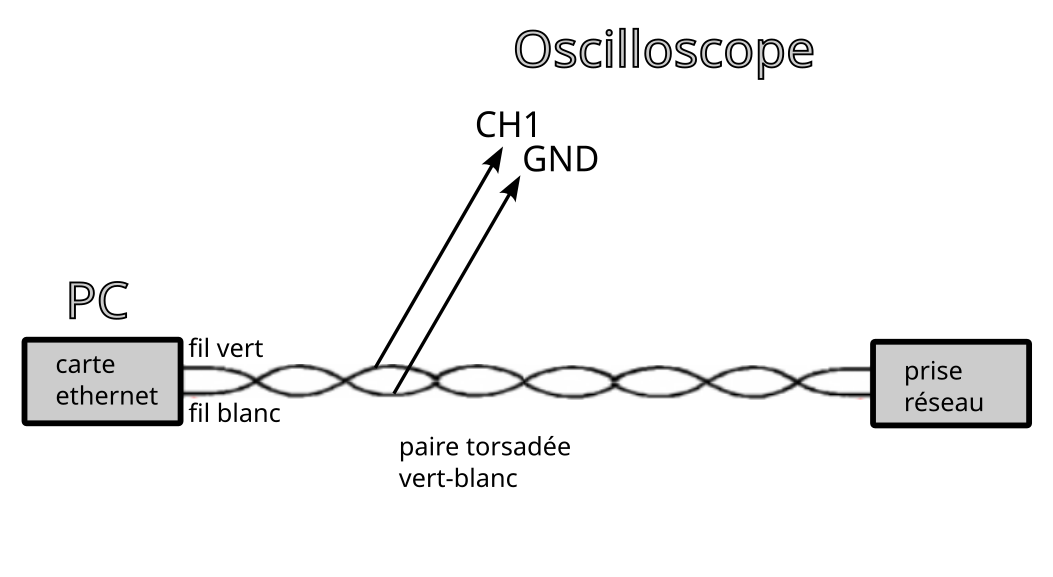


<div>
<img src="attachment:DS0003.BMP" width="600"/>
</div>

!!! question Question 1

**Un fichier CSV contenant les données de la voie 1 de l'oscilloscope est joint à ce document: T0005CH1.CSV. Télécharger-le et chercher dans quelle colonne se trouvent les valeurs correspondant aux données. On commencera à numéroter les colonnes à partir de 0.**

!!!




La biblothèque **csv** permet d'extraire les données d'un fichier csv.

https://docs.python.org/3/library/csv.html

!!! question Question 2

À l'aide de la documentation ci-dessus et de vos connaissances, compléter le code ci-dessous utilisant la bibliothèques csv pour extraire les colonnes adéquates du fichier **T0005CH1.CSV** dans deux **array numpy**: 

t et CH1

Afficher le graphique représentant les variations de la tension CH1 en fonction de t.

!!!

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt


##extraction des données
CH1=[]
t=[]
fichier = open("....", "r")






#Conversion en array numpy  
CH1=np.array(CH1)
t=np.array(t)

#affichage du graphe
plt.figure(0)      
plt.clf()          
plt.plot(... , ...)
plt.show()  



# 2. Mise en forme de la trame

On souhaite effectuer un pré-traitement des données afin de mettre en forme la trame pour permettre son décodage.

!!! question Question 3

- **Il est possible que les trames ne soient pas centrées autour de zéro: il faut retrancher la valeur moyenne à la liste CH1 en utilisant np.mean()**

- **Pour plus de commodités on souhaite normaliser les valeurs en ordonnées entre -1 et 1: np.max() renvoie la valeur maximale de la liste.**

!!!

In [ ]:
# suppression de la moyenne:


# Normalisation entre -1 et 1




#Affichage du graphe:
plt.figure(1)      
plt.clf()          
plt.plot(CH1)
plt.show()  


Zoomer sur le début du graphique: à partir de quelle valeur en abscisse la trame commence t-elle?


!!! question Question 4

**Utiliser un boucle while afin de nettoyer le début de la trame:**

- Tant que la valeur en ordonnée est inférieure à une certaine valeur (à définir), une variable i est incrémentée.

- Lorsque la valeur est dépassée, la boucle s'arrête et on redimensionne la liste à partir de la variable i: CH1 = CH1[i:]

!!!

In [ ]:





#affichage du début du graphe
plt.figure(2)      
plt.clf()          
plt.plot(CH1,'o-')
plt.show() 


# 3. Décodage des informations binaires


!!! question Question 5

**Ouvrir à nouveau le fichier CSV et chercher la valeur de l'intervalle entre deux échantillons ("Sample interval")**

!!!



!!! question Question 6

On rappelle qu'on avait réglé la vitesse de transmission à **10 Mbit/s** lors de l'acquisition des trames.


**Déterminer la durée d'un bit Tb puis le nombre d'échantillon par bit.**

!!!

!!! info

Le signal est encodé en manchester, il faut donc étudier la première moitié du bit en fonction de la deuxième moitié:

- Si la première moitié est un état haut et la deuxième moitié un état bas: le bit transféré est un '1'
- Si la première moitié est un état bas et la deuxième moitié un état haut: le bit transféré est un '0'

!!!


!!! question Question 7

**Compléter le morceau de code ci-dessous afin d'obtenir le signal manchester idéal en orange:**

!!!


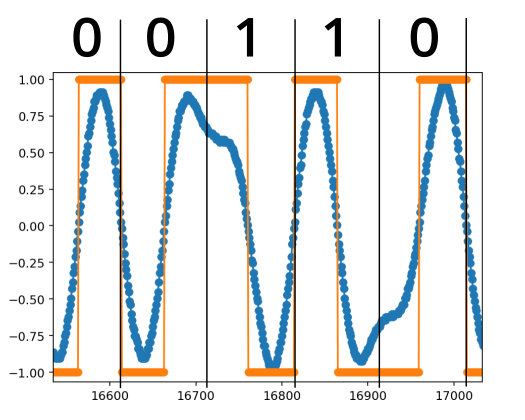

In [ ]:
CH1_ideal=[]
for i in range(len(CH1)):
    if CH1[i] <= .... :
        CH1_ideal.append(...)
    else:
        CH1_ideal.append(...)
        
#affichage du graphe
plt.figure(3)      
plt.clf()
plt.plot(CH1_ideal[10900:11600],'o-')
plt.plot(CH1[10900:11600],'o-')
plt.show() 


!!! question Question 8

**Compléter le morceau de code ci-dessous afin de décoder le signal manchester dans la liste CH1:**

!!!

In [ ]:
decode=''
i=0
#boucle sur la longueur totale:
while i < .....:
	
    

print(decode)

# 4. Suppression du préambule

Le préambule est utile pour a synchronisation du récepteur. Il est constitué de 7 octets 10101010 et d'un délimiteur de trame appelé SFD: 10101011:

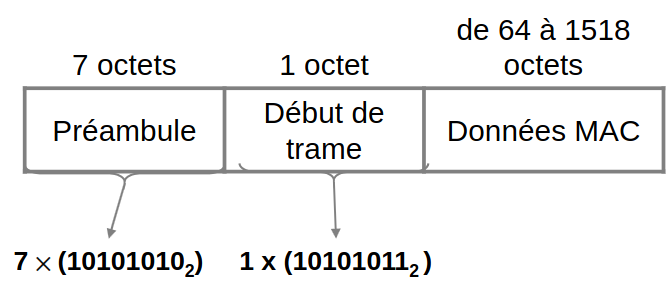


Il ne contient pas d'informations utiles, nous allons donc le supprimer.

!!! warning

Aussi étrange que ça paraisse, le préambule ne contient pas toujours le "bon" nombre de bits 101010.. au début. Force est de constater que parfois certaines trames présentent un préambule de 62 bits au lieu de 64.
Nous ne pourrons donc pas utiliser une boucle for pour supprimer le préambule ni nous fier au numéro de l'échantillon correspondant au début de la trame.

!!!


!!! question Question 9

**Écrire une boucle while permettant de supprimer le préambule et récupérer la trame débutant juste après le SFD: 10101011**

!!!

In [ ]:
...

print(trame)   

!!! note Question

En observant le début de la trame et en vous référant au cours de réseau, donner le destinataire de cette trame.

!!!


Trame Ethernet complète: 

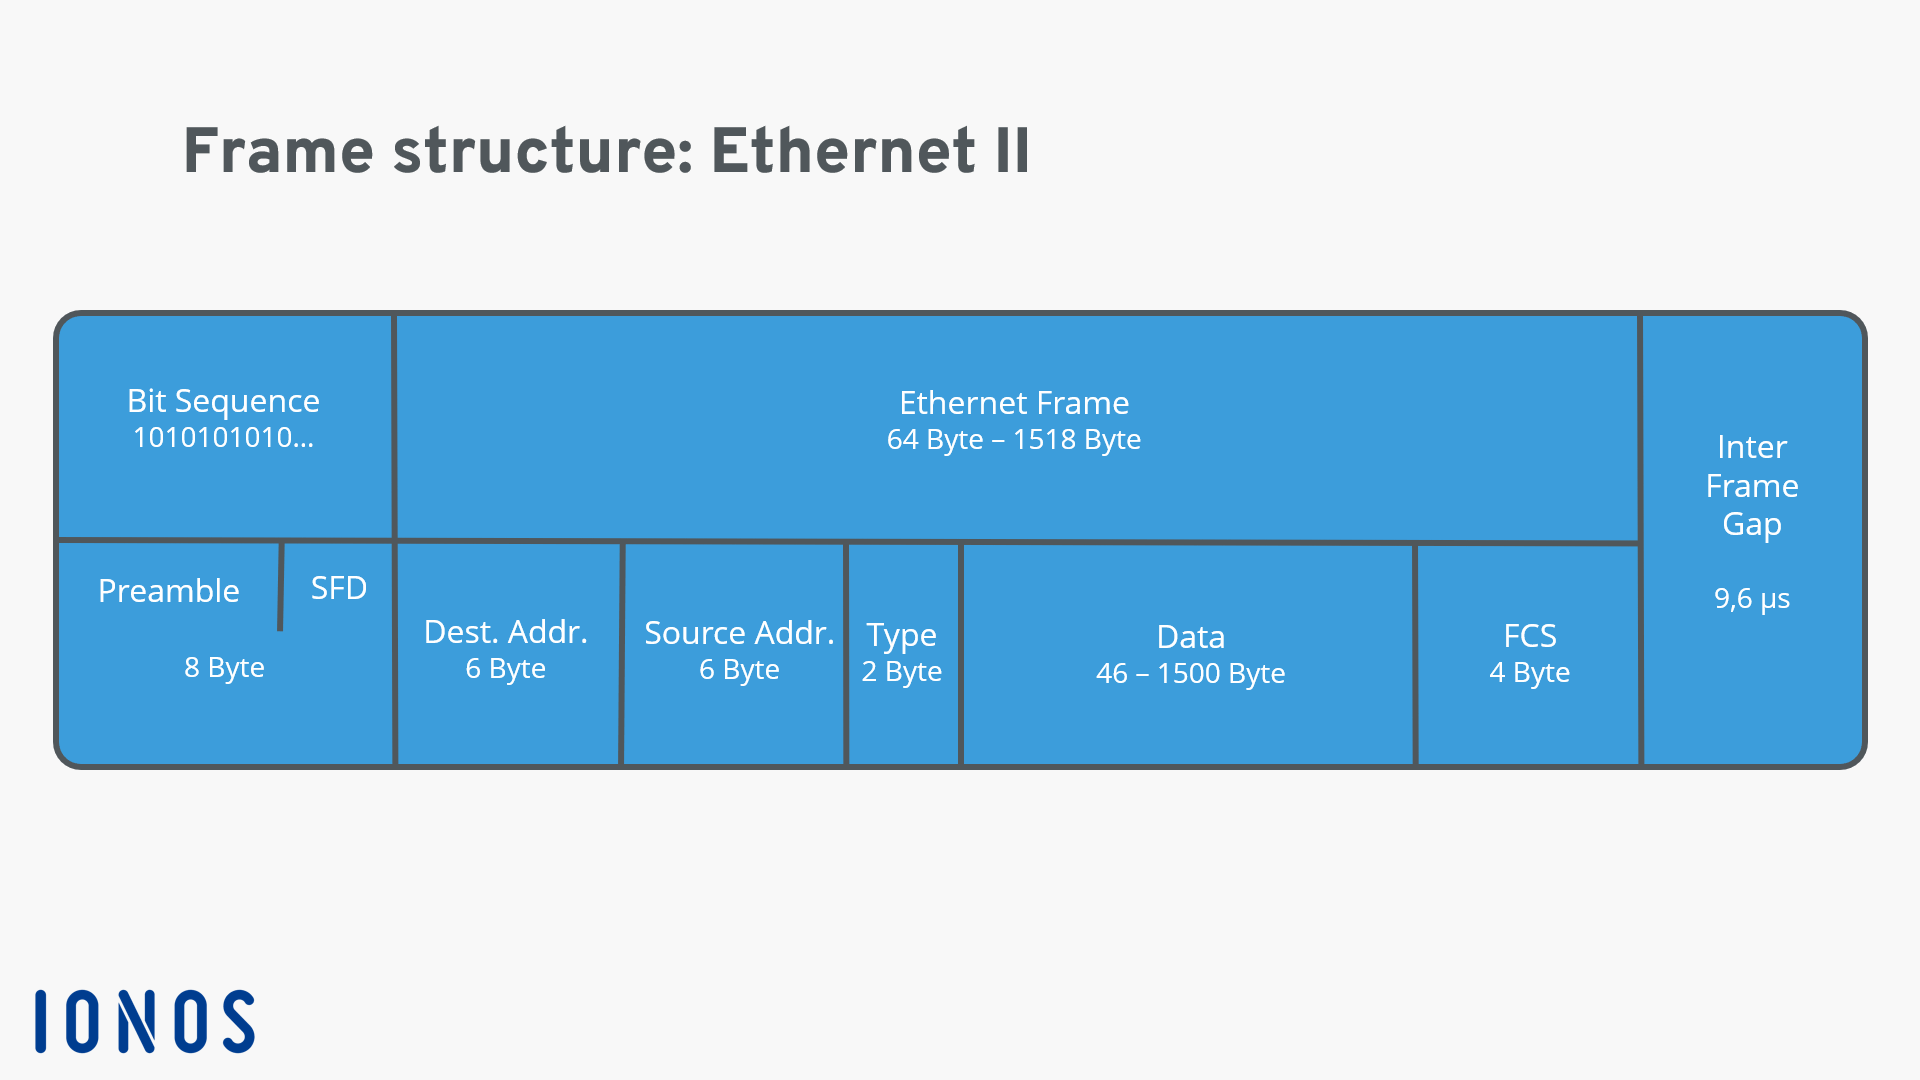

# 5. Affichage des octets en hexadécimal


## Récupération des valeurs binaires

!!! note

Dans le protocole Ethernet, les octets sont envoyés LSB (Low Significant Bit) en premier. C'est à dire que si on décode l'octet 00010011 (13 en hexadécimal), il s'agit en réalité de l'octet 11001000 (c8 en hexadécimal).

!!!


!!! question Question 10

**Afficher le premier octet de l'adresse MAC destination tel qu'il apparaît dans la variable decode. Inverser-le puis donner sa valeur en hexadécimal.**

!!!

In [ ]:
print(trame[0:8])

inversé: 11111111  donc ff en hexadécimal

Observez et commentez le code suivant:

In [ ]:
string = '0123456789'

print(string[::-1])

print(string[0:4][::-1])


[::-1] inverse la chaine de caractère

[0:4][::-1] permet d'inverser les 4 premiers caractères

!!! question Question 11

**Compléter le code ci-dessous afin d'afficher l'adresse MAC destination en binaire, d'abord sans boucle puis en utilisant une boucle for**

!!!




In [ ]:
#sans boucle:


#avec une boucle:




## Conversion en hexadécimal

!!! question Question 12

**Observez le code ci-dessous et commentez soigneusement ce que fait chaque étape:**

- int(binaire,2)
- hex(int(binaire,2))
- hex(int(binaire,2))[2:]
- hex(int(binaire,2))[2:].zfill(2)

!!!

In [ ]:
binaire = '00011101'

print(int(binaire,2))

print(hex(int(binaire,2)))

print(hex(int(binaire,2))[2:])


binaire = '00001111'

print(int(binaire,2))

print(hex(int(binaire,2)))

print(hex(int(binaire,2))[2:])

print(hex(int(binaire,2))[2:].zfill(2))

!!! question Question 13

**Modifier le code donné à la question 10 pour afficher l'adresse MAC destination en hexadécimal sur deux chiffres (ex: 0a:4d:00:12:3c)**

!!!

In [ ]:
#avec une boucle:




!!! question Question 14

**Modifier le code précédent pour afficher l'adresse MAC source (les six octets suivants).**

!!!

In [ ]:
source_mac=''




!!! question Question 15

**Chercher sur le site https://macvendors.com/ si l'adresse source est une adresse MAC valide. De quel constructeur s'agit-il ici? À quoi correspond l'adresse MAC destination? Est-ce un PC précis du parc informatique?**

!!!

!!! question Question 16

**Décoder de la même manière les deux octets suivants indiquant le type de la trame Ethernet (Ethertype). Effectuer une recherche et indiquer de quel type de trame il s'agit.**

!!!

In [ ]:
ether_type=''




!!! question Question 17

**À l'aide cette étude, élaborer un programme python, exécutable depuis la console, qui permettra d'extraire les informations obtenues ici (destination, source et type) depuis un fichier CSV fourni et indiquer quelle est le type de la trame.**

Exemple: 

$> python decode_ethernet.py   /chemin/fichier.CSV

destination: ff:ff:ff:ff:ff:ff

source: dc:4a:3e:41:e4:7c

Cette trame est de type ARP

!!!


Remarque: Les différents types sont répertoriés ici https://fr.wikipedia.org/wiki/EtherType

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Ce document  est mis à disposition selon les termes de la <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Licence Creative Commons Attribution -  Partage dans les Mêmes Conditions 4.0 International</a>.

Auteur : <a href="mailto:thomas.lavarenne@ac-creteil.fr">thomas.lavarenne@ac-creteil.fr</a>
